In [304]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [305]:
data=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df=data

In [306]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [307]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [308]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [309]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [310]:
df.shape

(200, 5)

In [311]:
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

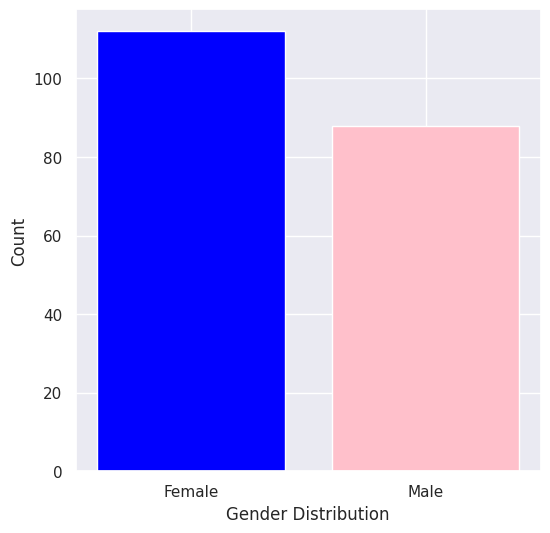

In [312]:
plt.figure(figsize=(6,6))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender Distribution')
plt.ylabel('Count')
plt.show()

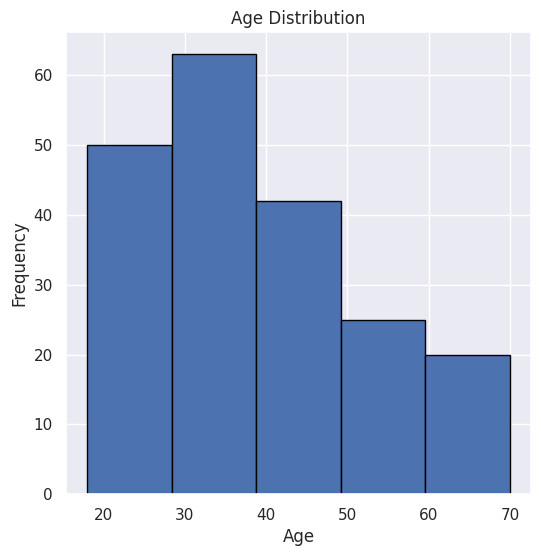

In [313]:
plt.figure(figsize=(6, 6))
plt.hist(df['Age'], bins=5, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

CLEANING

In [314]:
df = df.drop('CustomerID',axis=1)

In [315]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [316]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [317]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

/tmp/ipykernel_30/3911945517.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [318]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [319]:
X=df.drop('Spending Score (1-100)',axis=1)

In [320]:
Y=df['Spending Score (1-100)']

In [321]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit_transform(Y)

In [322]:

clustren=[]
j=[]

for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(X)
    clustren.append(i)
    j.append(model.inertia_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [323]:
pd.DataFrame(clustren,j)

,0
600.000000,1
398.622619,2
309.015109,3
236.564053,4
176.120571,5
130.164774,6
111.988590,7
98.617349,8
86.359110,9


num of clusters = 5

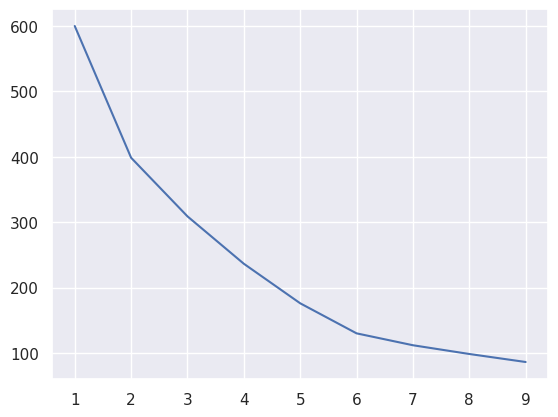

In [324]:
plt.plot(clustren,j)

In [325]:
optimal_clusters = 4
model = KMeans(n_clusters=optimal_clusters)
predictions = model.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [326]:
df['k_mean']=predictions

In [327]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3


In [328]:
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
157,1,30,78,78,0
52,1,31,43,54,3
139,1,35,74,72,0
37,1,30,34,73,3
77,0,40,54,48,2
39,1,20,37,75,3
121,1,38,67,40,0
169,0,32,87,63,2
99,0,20,61,49,2
57,0,69,44,46,1


In [329]:
silhouette_avg = silhouette_score(X, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.35914368579194433


In [330]:
df1=df[df['k_mean']==0]
df2=df[df['k_mean']==1]
df3=df[df['k_mean']==2]
df4=df[df['k_mean']==3]

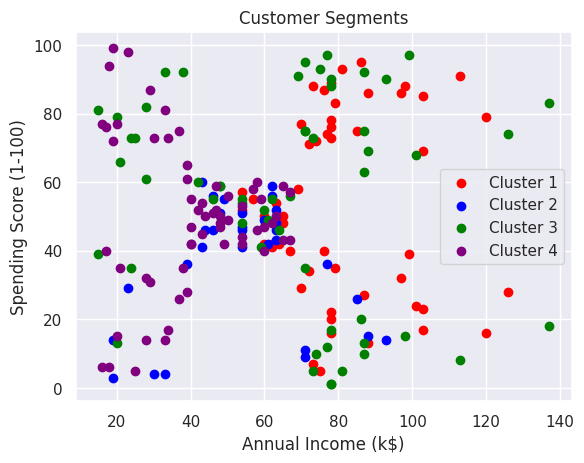

In [331]:
colors = ['red', 'blue', 'green', 'purple']
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color=colors[0], label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color=colors[1], label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color=colors[2], label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color=colors[3], label='Cluster 4')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()


In [332]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X)

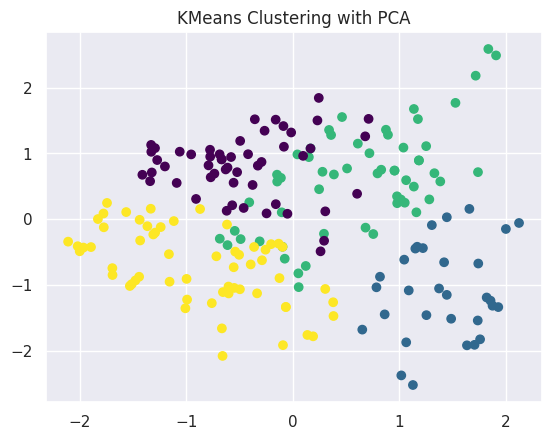

In [333]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis')
plt.title('KMeans Clustering with PCA')
plt.show()
